# Final Project - Final Report
##### Name: Shane Staret  
##### Class: CSCI 349 - Intro to Data Mining   
##### Semester: 2021SP   
##### Instructor: Brian King

## **[FINAL PROJECT VIDEO](https://mediaspace.bucknell.edu/media/FinalProjectVideo.mov/1_lj3dctqq)**

### **Introduction**

The primary problem presented through this dataset is one involving the prediction of student performance in secondary school based on data gathered on several hundred students. With 32 input variables, this is a high-dimensional dataset. The idea is to predict which of these variables, if any, can help us predict how well a student may perform academically. This is arguably a very important problem to look into, as determining variables that contribute to student achievement or failure can influence methods currently used within schooling to help students succeed. It can also help to identify variables that may irrelevant, allowing those focused on increasing student achievement to ignore these variables and focus on the impactful ones.

### **Data**

This dataset displays student achievement in secondary education of two Portuguese schools. The data was collected using school reports and questionnaires. There are 33 total data characteristics (1 being the target value, which is the final grade of each student). The data attributes include student grades, demographic, social and school related features. Two datasets are provided regarding the performance in two distinct subjects: Mathematics and Portuguese language. The two datasets were modeled under binary/five-level classification and regression tasks. The idea is to predict student performance based on the values of 32 attributes. This data is directly from the University of Minho and is hosted by the ICS School in the University of California, Irvine (UCI).

In [2]:
import pandas as pd

# reading in the dataset for the math course
df_mat = pd.read_csv('data/student-mat.csv', delimiter=';')

# reading in the dataset for the Portuguese course
df_por = pd.read_csv('data/student-por.csv', delimiter=';')

The following is the first 3 indices in each of the original two datasets:

In [5]:
display(df_mat.head(3))
display(df_por.head(3))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12


The following is the given explanation for each variable within both datasets:  
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)  
2 sex - student's sex (binary: "F" - female or "M" - male)  
3 age - student's age (numeric: from 15 to 22)  
4 address - student's home address type (binary: "U" - urban or "R" - rural)  
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)  
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)  
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)  
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)  
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")  
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")  
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")  
12 guardian - student's guardian (nominal: "mother", "father" or "other")  
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)  
16 schoolsup - extra educational support (binary: yes or no)  
17 famsup - family educational support (binary: yes or no)  
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  
19 activities - extra-curricular activities (binary: yes or no)  
20 nursery - attended nursery school (binary: yes or no)  
21 higher - wants to take higher education (binary: yes or no)  
22 internet - Internet access at home (binary: yes or no)  
23 romantic - with a romantic relationship (binary: yes or no)  
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)  
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)  
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)  
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  
29 health - current health status (numeric: from 1 - very bad to 5 - very good)  
30 absences - number of school absences (numeric: from 0 to 93)  
  
These grades are related with the course subject, Math or Portuguese:  
31 G1 - first period grade (numeric: from 0 to 20)  
31 G2 - second period grade (numeric: from 0 to 20)  
32 G3 - final grade (numeric: from 0 to 20, **output target**)

There is one [research paper](http://www3.dsi.uminho.pt/pcortez/student.pdf) that used this dataset to determine variables that are relevant to predicting student performance. They used regression DM methods, however, they also broke down this problem so that classification DM methods could also be applied. Scores range from 0 to 20, so they classified scores of 10 and below as being "failures" and 11 and above as being "successes". They were then able to apply certain classification methods (e.g. decision trees) to this problem as well. The methods used to evaluate the data in this paper included the use of a Decision Tree (DT), Random Forest (RF), Neural Network (NN), and Support Vector Machine (SVM). **The authors of this paper found that no meaningful predictions can be made UNLESS the first period grade and second period grade are factored in when predicting the final grade.**

### **Data Preparation**

In [7]:
from sklearn import preprocessing

# reassigning dtype for each attribute
df_mat['school'] = pd.Categorical(df_mat['school'])
df_por['school'] = pd.Categorical(df_por['school'])

df_mat['sex'] = pd.Categorical(df_mat['sex'])
df_por['sex'] = pd.Categorical(df_por['sex'])

df_mat['age'] = pd.to_numeric(df_mat['age'], downcast='unsigned')
df_por['age'] = pd.to_numeric(df_por['age'], downcast='unsigned')

df_mat['address'] = pd.Categorical(df_mat['address'])
df_por['address'] = pd.Categorical(df_por['address'])

df_mat['famsize'] = pd.Categorical(df_mat['famsize'])
df_por['famsize'] = pd.Categorical(df_por['famsize'])

df_mat['Pstatus'] = pd.Categorical(df_mat['Pstatus'])
df_por['Pstatus'] = pd.Categorical(df_por['Pstatus'])

df_mat['Medu'] = pd.Categorical(df_mat['Medu']).as_ordered()
df_por['Medu'] = pd.Categorical(df_por['Medu']).as_ordered()

df_mat['Fedu'] = pd.Categorical(df_mat['Fedu']).as_ordered()
df_por['Fedu'] = pd.Categorical(df_por['Fedu']).as_ordered()

df_mat['Mjob'] = pd.Categorical(df_mat['Mjob'])
df_por['Mjob'] = pd.Categorical(df_por['Mjob'])

df_mat['Fjob'] = pd.Categorical(df_mat['Fjob'])
df_por['Fjob'] = pd.Categorical(df_por['Fjob'])

df_mat['reason'] = pd.Categorical(df_mat['reason'])
df_por['reason'] = pd.Categorical(df_por['reason'])

df_mat['guardian'] = pd.Categorical(df_mat['guardian'])
df_por['guardian'] = pd.Categorical(df_por['guardian'])

df_mat['traveltime'] = pd.Categorical(df_mat['traveltime']).as_ordered()
df_por['traveltime'] = pd.Categorical(df_por['traveltime']).as_ordered()

df_mat['studytime'] = pd.Categorical(df_mat['studytime']).as_ordered()
df_por['studytime'] = pd.Categorical(df_por['studytime']).as_ordered()

df_mat['failures'] = pd.Categorical(df_mat['failures']).as_ordered()
df_por['failures'] = pd.Categorical(df_por['failures']).as_ordered()

df_mat['schoolsup'] = pd.Categorical(df_mat['schoolsup'])
df_por['schoolsup'] = pd.Categorical(df_por['schoolsup'])

df_mat['famsup'] = pd.Categorical(df_mat['famsup'])
df_por['famsup'] = pd.Categorical(df_por['famsup'])

df_mat['paid'] = pd.Categorical(df_mat['paid'])
df_por['paid'] = pd.Categorical(df_por['paid'])

df_mat['activities'] = pd.Categorical(df_mat['activities'])
df_por['activities'] = pd.Categorical(df_por['activities'])

df_mat['nursery'] = pd.Categorical(df_mat['nursery'])
df_por['nursery'] = pd.Categorical(df_por['nursery'])

df_mat['higher'] = pd.Categorical(df_mat['higher'])
df_por['higher'] = pd.Categorical(df_por['higher'])

df_mat['internet'] = pd.Categorical(df_mat['internet'])
df_por['internet'] = pd.Categorical(df_por['internet'])

df_mat['romantic'] = pd.Categorical(df_mat['romantic'])
df_por['romantic'] = pd.Categorical(df_por['romantic'])

df_mat['famrel'] = pd.to_numeric(df_mat['famrel'], downcast='unsigned')
df_por['famrel'] = pd.to_numeric(df_por['famrel'], downcast='unsigned')

df_mat['freetime'] = pd.to_numeric(df_mat['freetime'], downcast='unsigned')
df_por['freetime'] = pd.to_numeric(df_por['freetime'], downcast='unsigned')

df_mat['goout'] = pd.to_numeric(df_mat['goout'], downcast='unsigned')
df_por['goout'] = pd.to_numeric(df_por['goout'], downcast='unsigned')

df_mat['Dalc'] = pd.to_numeric(df_mat['Dalc'], downcast='unsigned')
df_por['Dalc'] = pd.to_numeric(df_por['Dalc'], downcast='unsigned')

df_mat['Walc'] = pd.to_numeric(df_mat['Walc'], downcast='unsigned')
df_por['Walc'] = pd.to_numeric(df_por['Walc'], downcast='unsigned')

df_mat['health'] = pd.to_numeric(df_mat['health'], downcast='unsigned')
df_por['health'] = pd.to_numeric(df_por['health'], downcast='unsigned')

df_mat['absences'] = pd.to_numeric(df_mat['absences'], downcast='unsigned')
df_por['absences'] = pd.to_numeric(df_por['absences'], downcast='unsigned')

df_mat['G1'] = pd.to_numeric(df_mat['G1'], downcast='unsigned')
df_por['G1'] = pd.to_numeric(df_por['G1'], downcast='unsigned')

df_mat['G2'] = pd.to_numeric(df_mat['G2'], downcast='unsigned')
df_por['G2'] = pd.to_numeric(df_por['G2'], downcast='unsigned')

df_mat['G3'] = pd.to_numeric(df_mat['G3'], downcast='unsigned')
df_por['G3'] = pd.to_numeric(df_por['G3'], downcast='unsigned')

# adding column to each df to designate the course that the students are in
df_mat['course'] = 'mat'
df_mat['course'] = pd.Categorical(df_mat['course'])
df_por['course'] = 'por'
df_por['course'] = pd.Categorical(df_por['course'])

# combine data frames
df_com = pd.concat([df_mat, df_por], ignore_index=True)
df_com['course'] = pd.Categorical(df_com['course'])

# convert all categorical attributes in combined dataframe to numeric
cat_columns = df_com.select_dtypes(['category']).columns
df_com[cat_columns] = df_com[cat_columns].apply(lambda x: x.cat.codes)

# standardizing all data (except for grade variables)
min_max_scaler = preprocessing.MinMaxScaler()
df_com.loc[:, (df_com.columns != 'G1') & (df_com.columns != 'G2') & (df_com.columns != 'G3')] = min_max_scaler.fit_transform(df_com.loc[:, (df_com.columns != 'G1') & (df_com.columns != 'G2') & (df_com.columns != 'G3')])

# downcasting all data
df_com = df_com.apply(pd.to_numeric, downcast='float')

**Explanation**: All nominal and binary data were initially converted to categorical data. All data that wasn't numerical was then converted to numerical so that regression models could be applied. To ensure that there was no bias when models were applied to the data, all of the data was standardized using the MinMaxScaler given in the sklearn library. All of the data was then combined so that both courses could be evaluated at once. Finally, all variables were downcasted to ensure that the dataset took up as little memory as possible.

The following are some of the more relevant summary statistics inititally presented in DataPrep_EDA.ipynb:

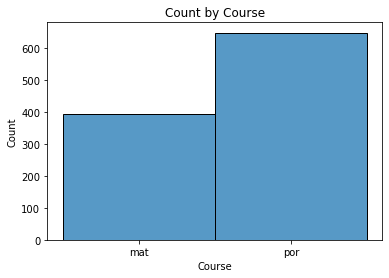

In [200]:
# histplot of number of students in each course
ax = sns.histplot(data=df_com, x="course")
ax.set_xlabel("Course")
ax.set_title("Count by Course")
plt.show()

The above histplot shows the number of students in the two courses demonstrated in this dataset. Clearly, there are more students in the Portuguese language course than the math course.

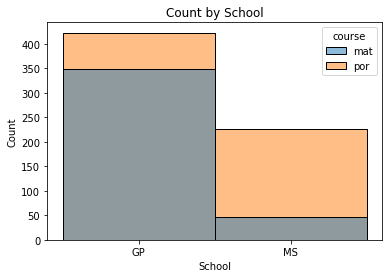

In [201]:
# histplot of number of students in each school
ax = sns.histplot(data=df_com, x="school", hue="course")
ax.set_xlabel("School")
ax.set_title("Count by School")
plt.show()

The above histplot shows that there are a greater proportion of students in the Portuguese language course from the MS school than in the Math course. This plot also shows that there is a greater number of students from the GP school in both courses.

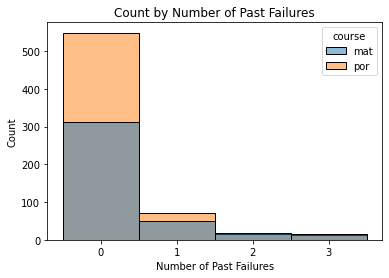

In [219]:
# histplot of number of students by number of past failures
ax = sns.histplot(data=df_com, x="failures", hue="course")
ax.set_xlabel("Number of Past Failures")
ax.set_title("Count by Number of Past Failures")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

Clearly, the majority of students had no past class failures. Interestingly, it seems that the math and Portuguese language course had about the same number of students who failed 2 or 3 times in the past, indicating that there is a higher proportion of students in the math course who have failed 2 or 3 times compared to the proportion in the Portuguese language course.

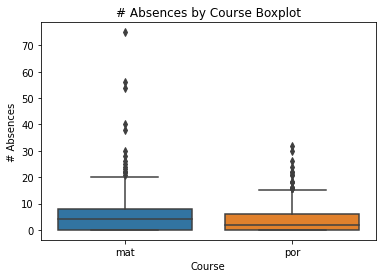

In [241]:
# boxplot of students by number of absences by course
ax = sns.boxplot(data=df_com, x="course", y="absences")
ax.set_xlabel("Course")
ax.set_ylabel("# Absences")
ax.set_title("# Absences by Course Boxplot")
plt.show()

Interestingly, it appears that math students have a higher number of absences in general. Also, the students that have a very large number of absences (40 and above) only appear in the math course.

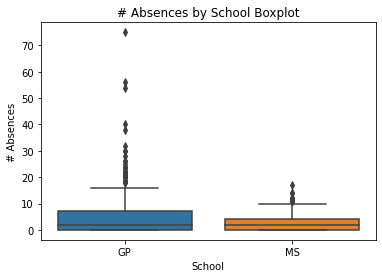

In [242]:
# boxplot of students by number of absences by school
ax = sns.boxplot(data=df_com, x="school", y="absences")
ax.set_xlabel("School")
ax.set_ylabel("# Absences")
ax.set_title("# Absences by School Boxplot")
plt.show()

The above boxplot clearly shows that GP students generally have a larger number of absences compared to MS students. Also, students containing an extreme number of absences appear to all come from the GP school rather than the MS school.

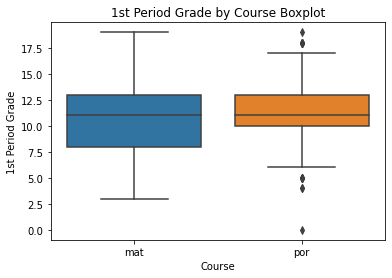

In [243]:
# boxplot of students by first period grade
ax = sns.boxplot(data=df_com, x="course", y="G1")
ax.set_xlabel("Course")
ax.set_ylabel("1st Period Grade")
ax.set_title("1st Period Grade by Course Boxplot")
plt.show()

Overall, it appears that the Portuguese language course saw a wider range of grades compared to the math course. Interestingly though, the majority of data for the language course appears to be tightly clustered together compared to the math course, there are just 5 outliers in the language course that make the range wider.

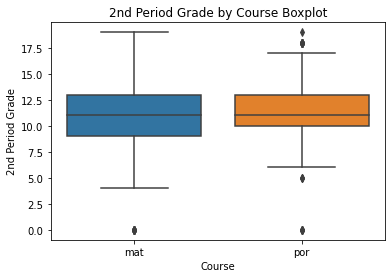

In [244]:
# boxplot of students by second period grade
ax = sns.boxplot(data=df_com, x="course", y="G2")
ax.set_xlabel("Course")
ax.set_ylabel("2nd Period Grade")
ax.set_title("2nd Period Grade by Course Boxplot")
plt.show()

This plot shows that the second period grade distributions were quite similar to the first period. Again, the Portuguese language course has more outliers, but an overall tighter grouping of scores compared to the math course.

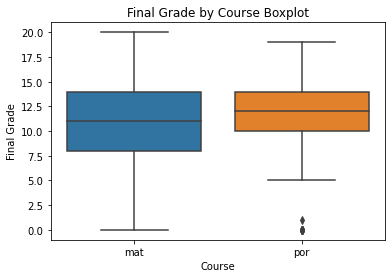

In [194]:
# boxplot of students by final grade by course
ax = sns.boxplot(data=df_com, x="course", y="G3")
ax.set_xlabel("Course")
ax.set_ylabel("Final Grade")
ax.set_title("Final Grade by Course Boxplot")
plt.show()

Overall, it appears that the math course saw a wider range of grades compared to the Portuguese language course. Scores below 5 were not considered outliers for the math course, but they were for the Portuguese language course. The Portuguese language course also appears to have had a slightly higher median score compared to the math course and a tighter range of scores in general.

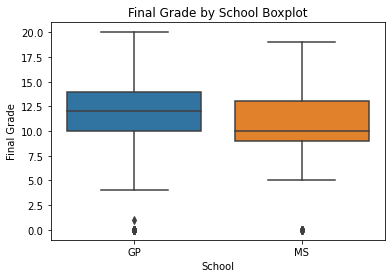

In [195]:
# boxplot of students by final grade by school
ax = sns.boxplot(data=df_com, x="school", y="G3")
ax.set_xlabel("School")
ax.set_ylabel("Final Grade")
ax.set_title("Final Grade by School Boxplot")
plt.show()

Overall, it appears that the GP school contained higher average scores than the MS school, though not very significantly. The MS school only contained one student that performed very poorly whereas the GP school contained two. Also, the MS school appeared to have a slightly tighter range of scores compared to the GP school.

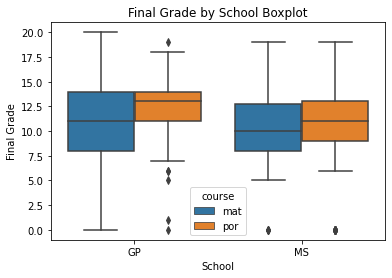

In [196]:
# boxplot of students by final grade by school (with course as hue)
ax = sns.boxplot(data=df_com, x="school", y="G3", hue="course")
ax.set_xlabel("School")
ax.set_ylabel("Final Grade")
ax.set_title("Final Grade by School Boxplot")
plt.show()

It appears that in general, GP students performed better in both courses compared to MS students. However, while the average GP student may have done better than the average MS student, it appears that the GP school was more likely to have low performers than the MS school, as the bottom of the boxplot for the GP math course extends to 0, whereas the boxplot for the MS math course only extends to 5. Similarly, the GP school has 4 low performing outliers for the Portuguese language course, whereas the MS school only has 1.

### **Model**

Interestingly, the multiple linear regression model performed best, particularly when first period and second period grades were considered when predicting final grades. Of course, a multiple linear regression model was not the only model used to evaluate the data. A Keras NN model utilizing Kfold validation was also used on the combined dataset. However, when not considering first or second period grades, this model actually produced a *negative* R2 score, indicating that the model had extremely poor performance. When this Keras model was used on the dataset including the first and second period grades, it improved, having a moderately positive R2 score, but it still performed quite worse than the multiple linear regression model.  
  
In the final version of the Keras model, 10-fold validation was applied, along with a batch size of 4, and 150 epochs for each fold. Having a very low batch size resulted in the highest accuracy and accuracy in general appeared to stagnate around 125 epochs. It is likely that a value for k greater than 10 could have been chosen given the amount of samples in the combined dataset (1044 total rows), however, 10 was chosen for runtime purposes. The adam optimizer was used and the relu activation function was used (only for the input perceptrons) in the final version as well. Also, for the output perceptrons, the softmax activation function was utilized because otherwise there were issues where the loss would climb to infinity as the epochs ran. Interestingly, the adam optimizer and the relu activation function were the initial choices and they appear to be the best for this model in terms of accuracy. The sigmoid activation function and the sgd optimizer were also attempted, but both seemingly contributed to lower accuracies, so relu and adam were the final choices. Also, the Keras model also contained a hidden layer with 10 nodes. Initially, 5 hidden nodes were included but 10 led to consistently higher accuracies while 15 appeared to have no effect. So having 10 hidden nodes was the final choice.  
  
Even with all of this experimenting, the Keras model *still* does not perform as well as the multiple linear regression model. I suspect I may have some issues with how I assembled this model, but I have exhaustedly tried to make this model work better than the multiple linear regression model with minimal success.

### **Performance Results**

**The following are the results for the multiple linear regression model NOT including the first and second period grades:**  
Mean Absolute Error: 2.1597762  
Mean Squared Error: 7.7431164  
Root Mean Squared Error: 2.7826455  
R2: 0.17523701152448756

**The following are the results for the multiple linear regression model including the first and second period grades:**  
Mean Absolute Error: 0.8423875  
Mean Squared Error: 1.5384248  
Root Mean Squared Error: 1.2403326  
R2: 0.8361336894879354

**The following are the results for the Keras NN model NOT including the first and second period grades:**  
Mean Absolute Error: 3.485632183908046  
Mean Squared Error: 21.487547892720308  
Root Mean Squared Error: 4.635466308012637  
R2: -0.4399583876313877

**The following are the results for the Keras NN model including the first and second period grades:**  
Mean Absolute Error: 2.2519157088122603  
Mean Squared Error: 7.953065134099617  
Root Mean Squared Error: 2.8201179291121172  
R2: 0.4670363084516823

Clearly, the multiple linear regression model when including the first and second period grades performed the best, followed by the Keras NN model when including the first and second period grades. The multiple linear regression model when not including the first and second period grades performed rather poorly, with an R2 score close to 0. However, the Keras NN model when not including the first and second period grades performed extremely poorly, as the R2 score was actually negative.

### **Discussion**

Based on the multiple linear regression model (when not including the first or second period grades), it appears that sex, activities, traveltime, and Fjob are all very irrelevant input variables (since their coefficients are very close to 0). Interestingly, it appears that Medu, studytime, higher, famrel, the course taken, and the number of absences all contribute positively to the prediction of the final score. The most surprising variable there is absences, as I would assume that a higher number of abscences would not lead to a prediction of a higher final grade. Finally, it appears that failures and schoolsup have significant negative contributions to the prediction of final score. Increased number of failures in particular appears to be highly correlated with a low final grade.  
  
When the first and second period grades are looked at when using the multiple linear regression model, the variables that appear to have influence over the final grade prediction change. A high number of past failures can still be seen as contributing to a lower predicted final score. Weekday drinking also appears to negatively impact final grade prediction. Second period grades, absences, a good family relationship, and travel time also appear to contribute positively to final scores. This is interesting, as I would not have predicted that high absences or high travel time would positively impact the prediction of the final scores. The course being taken also appears to influence the grade achieved quite a bit. For the most part, no other variables are relevant.  
  
As far as data prepartion/cleaning goes, there were virtually no issues as their was no incomplete data and the variable values were fortunately organized intelligently, leading to the preparation of the dataset being a relatively trivial portion of this project. As stated in the above section, the modeling results were quite surprising, as I expected the Keras NN model to eventually perform better than the multiple linear regression model. However, this obviously was not the case. 

### **Conclusions**

Overall, it appears that the conclusions in the research paper that evaluated this dataset are very similar to the conclusions of this project. Unless the first and second period grades are included, it is difficult to generate any meaningful predictions or a list of variables that are relevant/irrelevant to a student's final scores. In other words, previous student performance is the best predictor of future student importance. Of course, there are other variables that contribute negatively (previous failures, high weekday drinking, etc) and positively (good family relationship, school support, etc) but their influence appears to not be as great as the previous performance variables (G1 & G2).  

While not many strong relationships could be generated between the input variables and student performance, many irrelevant variables were found. These results could be used to focus on specific variables that have appear to have relevant influence on student performance, while putting less emphasis on attributes that appear to not have much effect.